<a href="https://colab.research.google.com/github/Shriansh16/NLP/blob/main/FakeNewsClassifierUsingBiDirectionalLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/train.csv.zip'

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.reset_index(drop=True,inplace=True)

<Axes: >

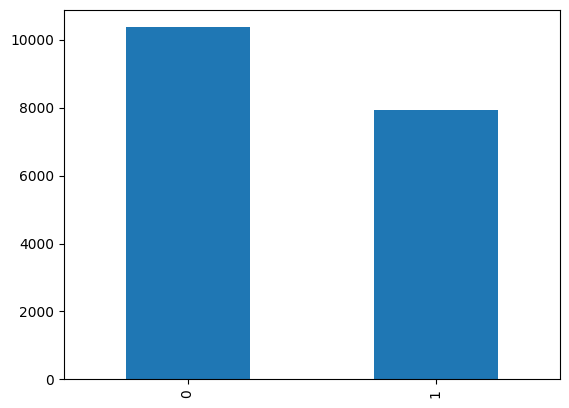

In [8]:
df['label'].value_counts().plot(kind='bar')

In [9]:
import tensorflow

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense   #for creating neuron
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [11]:
voc_size=5000

In [12]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

In [13]:
pstem=PorterStemmer()

In [19]:
def preprocess_text(text):
  text=text.lower()
  text=re.sub('[^A-Za-z]',' ',text)
  words=nltk.word_tokenize(text)
  words=[pstem.stem(word) for word in words if word not in stopwords.words('english')]
  return ' '.join(words)

In [35]:
corpus=df['title'].apply(preprocess_text)

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
corpus

0        hous dem aid even see comey letter jason chaff...
1          flynn hillari clinton big woman campu breitbart
2                                     truth might get fire
3                 civilian kill singl us airstrik identifi
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
18280            rapper trump poster child white supremaci
18281      n f l playoff schedul matchup odd new york time
18282    maci said receiv takeov approach hudson bay ne...
18283             nato russia hold parallel exercis balkan
18284                                          keep f aliv
Name: title, Length: 18285, dtype: object

In [37]:

onehot_repr=[one_hot(words,voc_size) for words in corpus]

In [39]:
onehot_repr[1]

[3624, 2632, 3138, 4074, 2203, 1362, 2441]

In [40]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [41]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=20)

In [43]:
embedded_docs

array([[   0,    0,    0, ..., 1539, 1187, 4813],
       [   0,    0,    0, ..., 2203, 1362, 2441],
       [   0,    0,    0, ..., 1958,  997, 2503],
       ...,
       [   0,    0,    0, ...,  728, 2543, 1864],
       [   0,    0,    0, ..., 1770, 3610, 2803],
       [   0,    0,    0, ..., 4676, 1876,  842]], dtype=int32)

In [47]:
embedded_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedded_vector_features,input_length=20))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
X=np.array(embedded_docs)
y=np.array(df['label'])

In [50]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [54]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
458/458 [==============================] - 18s 40ms/step - loss: 0.1404 - accuracy: 0.9469 - val_loss: 0.2072 - val_accuracy: 0.9117
Epoch 2/5
458/458 [==============================] - 18s 38ms/step - loss: 0.0978 - accuracy: 0.9636 - val_loss: 0.2462 - val_accuracy: 0.9119
Epoch 3/5
458/458 [==============================] - 18s 38ms/step - loss: 0.0668 - accuracy: 0.9785 - val_loss: 0.2640 - val_accuracy: 0.9103
Epoch 4/5
458/458 [==============================] - 22s 48ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.3192 - val_accuracy: 0.9048
Epoch 5/5
458/458 [==============================] - 18s 39ms/step - loss: 0.0263 - accuracy: 0.9927 - val_loss: 0.3948 - val_accuracy: 0.9070


In [55]:
y_pred=model.predict(X_test)

115/115 [==============================] - 2s 10ms/step


In [56]:
y_pred=np.where(y_pred>=0.5,1,0)


In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_pred)

0.9070276182663385